In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
exp = pd.read_excel('Data/Exports (p of GDP).xlsx', sheet_name = 'Data')
co2 = pd.read_excel('Data/indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx', sheet_name = 'Data')
gdp = pd.read_excel('Data/indicator gapminder gdp_per_capita_ppp.xlsx', sheet_name = 'Data')
birth = pd.read_excel('Data/indicator life_expectancy_at_birth.xlsx', sheet_name = 'Data')
cpi = pd.read_excel('Data/indicator ti cpi 2009.xlsx', sheet_name = 'Data')
hdi = pd.read_excel('Data/Indicator_HDI.xlsx', sheet_name = 'Data')
gov_health = pd.read_excel('Data/indicator_per capita government expenditure on health (ppp int. $).xlsx', sheet_name = 'Data')
tot_health = pd.read_excel('Data/indicator_per capita total expenditure on health (ppp int. $).xlsx', sheet_name = 'Data')
pop_female = pd.read_excel('Data/indicator_total population female.xlsx', sheet_name = 'Data')
pop_male = pd.read_excel('Data/indicator_total population male.xlsx', sheet_name = 'Data')
gni = pd.read_excel('Data/indicatorGNIpercapitaATLAS.xlsx', sheet_name = 'Data')
oil_pro= pd.read_excel('Data/Oil Production.xlsx', sheet_name = 'Data')

In [3]:
gdp.head()

,Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [4]:
gni.head()

,Country,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42740.0,44250.0,43760.0,44180.0,41670.0,40580.0,41010.0,43270.0,45655.0,48170.0
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,280.0,340.0,370.0,470.0,520.0,570.0,690.0,690.0,670.0,651.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1620.0,2350.0,3010.0,3490.0,3550.0,3690.0,4150.0,4730.0,4850.0,4973.0
4,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3120.0,3530.0,4080.0,4280.0,4360.0,4390.0,4370.0,4510.0,4460.0,4411.0


In [5]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Columns: 217 entries, Country to 2015
dtypes: float64(216), object(1)
memory usage: 444.3+ KB


In [6]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  180 non-null    object 
 1   2008     180 non-null    float64
 2   2009     176 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


In [7]:
#Table for GNI per capita after data are binned into category

gni_bin = gni.loc[:,('Country', 2015)] 
gni_bin = gni_bin.dropna() 
bins = [0, 1025, 4035, 12475, 1000000] 
group_names = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income'] 
categories = pd.cut(gni_bin[2015], bins, labels=group_names)
binned_gni = pd.value_counts(categories) 
binned_gni

Upper Middle Income    69
High Income            67
Lower Middle Income    53
Low Income             30
Name: 2015, dtype: int64

In [8]:
#Table for CPI index and GNI/capita of year 2009 by country is constructed
cpi_2009 = cpi[['Country', 2009]]
cpi_2009 = cpi_2009.dropna()
cpi_2009.rename(columns={2009: 'CPI'}, inplace=True)

gni_pc = gni[['Country', '2009']]
gni_pc = gni_pc.dropna()
gni_pc.rename(columns={'2009': 'GNI'}, inplace=True)

CPI_GNI = pd.merge(left=cpi_2009, right=gni_pc, left_on='Country', right_on='Country')
CPI_GNI.head(10)

,Country,CPI,GNI
0,New Zealand,9.3,29410.0
1,Denmark,9.3,59840.0
2,Sweden,9.2,51900.0
3,Singapore,9.3,37080.0
4,Switzerland,8.7,70230.0
5,Finland,9.2,48590.0
6,Netherlands,8.8,53140.0
7,Iceland,8.5,42250.0
8,Canada,8.9,43060.0
9,Australia,8.7,44000.0


In [9]:
#Table for 2011 HDI index and GNI/capita by country is constructed
hdi_2011 = hdi[['Country',2011]]
hdi_2011 = hdi_2011.dropna()
hdi_2011.rename(columns={2011: 'HDI'},inplace=True)

gni_pc = gni[['Country', '2011']]
gni_pc = gni_pc.dropna()
gni_pc.rename(columns={'2011': 'GNI'},inplace=True)

HDI_GNI = pd.merge(left=hdi_2011, right=gni_pc, left_on='Country', right_on='Country')
HDI_GNI.head(10)

,Country,HDI,GNI
0,Afghanistan,0.398,570.0
1,Albania,0.739,4390.0
2,Algeria,0.698,4580.0
3,Andorra,0.838,40580.0
4,Angola,0.486,3690.0
5,Antigua and Barbuda,0.764,12370.0
6,Argentina,0.797,11920.0
7,Armenia,0.716,3420.0
8,Australia,0.929,50060.0
9,Austria,0.885,50420.0


In [10]:
#Table for 2010 population(male and female population are added together), GDP/capita and Export Value/GDP in % by country is constructed

female = pop_female[['Country', 2010]]
female = female[28:]
female = female.dropna()

male = pop_male[['Country', 2010]]
male = male[28:]
male = female.dropna()

population = pd.merge(left=female, right=male, left_on='Country', right_on='Country')
population.rename(columns={'2010_x': 'Male', '2010_y':'Female'}, inplace=True)
population['population'] = population['Male'] + population['Female']
population['population'] = (population['population']).astype(int)
population = population[['Country','population']]

gdp_pc = gdp[['Country', 2010]]
gdp_pc = gdp_pc.dropna()
gdp_pc.rename(columns={2010: 'GDP'}, inplace=True)

exp_pgdp = exp[['Country', '2010']]
exp_pgdp = exp_pgdp.dropna()
exp_pgdp.rename(columns={'2010': 'EXP'}, inplace=True)

PG = pd.merge(left=population, right=gdp_pc, left_on='Country', right_on='Country')
PGE = pd.merge(left=PG, right=exp_pgdp, left_on='Country', right_on='Country')

PGE.head(10)

,Country,population,GDP,EXP
0,Afghanistan,28076946,1637.0,20.124519
1,Albania,3211836,9374.0,32.427471
2,Algeria,35080840,12494.0,30.830405
3,Angola,19261294,7047.0,62.413106
4,Argentina,41438344,15765.0,21.706469
5,Armenia,3299958,6508.0,20.583611
6,Australia,21633768,41330.0,19.620065
7,Austria,8588744,42861.0,54.103261
8,Azerbaijan,9126614,15950.0,53.970015
9,Bahamas,353364,22915.0,41.473980


In [11]:
#Table for 2010 life expectancy, total health expenditure, government health expenditure and GDP/capita by country is constructed

life = birth[['Country', 2010]]
life = life.dropna()
life.rename(columns={2010: 'Life Expectancy'}, inplace=True)

t_health = tot_health[['Country', 2010]]
t_health = t_health.dropna()
t_health.rename(columns={2010: 'Total Health Exp'}, inplace=True)

gov_health = tot_health[['Country', 2010]]
gov_health = gov_health.dropna()
gov_health.rename(columns={2010: 'Gov. Health Exp.'}, inplace=True)

gdp_pc = gdp[['Country', 2010]]
gdp_pc = gdp_pc.dropna()
gdp_pc.rename(columns={2010: 'GDP'}, inplace=True)

LT = pd.merge(left=life, right=t_health, left_on='Country', right_on='Country')
LTG = pd.merge(left=LT, right=gov_health, left_on='Country', right_on='Country')
LTGG = pd.merge(left=LTG, right=gdp_pc, left_on='Country', right_on='Country')

LTGG.head(10)

,Country,Life Expectancy,Total Health Exp,Gov. Health Exp.,GDP
0,Afghanistan,53.6,44.465952,44.465952,1637.0
1,Albania,77.2,577.275816,577.275816,9374.0
2,Algeria,76.0,330.006155,330.006155,12494.0
3,Andorra,84.7,3254.524918,3254.524918,38982.0
4,Angola,57.6,168.130557,168.130557,7047.0
5,Antigua and Barbuda,75.8,990.552253,990.552253,20567.0
6,Argentina,75.8,1286.678797,1286.678797,15765.0
7,Armenia,73.0,238.522122,238.522122,6508.0
8,Australia,82.0,3441.042109,3441.042109,41330.0
9,Austria,80.5,4387.915343,4387.915343,42861.0


In [12]:
#Table for 2010 CO2 emission/capita, Oil Production and GDP/capita by country

oil = oil_pro[['Country', 2010]]
oil = oil.dropna()
oil.rename(columns={2010: 'Oil Production'}, inplace=True)

co = co2[['Country', 2010]]
co = co.dropna()
co.rename(columns={2010: 'CO2 Emission'}, inplace=True)

gdp_pc = gdp[['Country', 2010]]
gdp_pc = gdp_pc.dropna()
gdp_pc.rename(columns={2010: 'GDP'}, inplace=True)

OC = pd.merge(left=oil, right=co, left_on='Country', right_on='Country')
OCG = pd.merge(left=OC, right=gdp_pc, left_on='Country', right_on='Country')

OCG.head(10)

,Country,Oil Production,CO2 Emission,GDP
0,Algeria,7.550114e+07,3.480977,12494.0
1,Angola,9.197321e+07,1.593918,7047.0
2,Argentina,3.254959e+07,4.466338,15765.0
3,Australia,2.462724e+07,16.752301,41330.0
4,Azerbaijan,5.083820e+07,4.976935,15950.0
5,Brazil,1.117067e+08,2.152981,14660.0
6,Brunei,8.394330e+06,22.960326,70636.0
7,Canada,1.643689e+08,14.672016,40773.0
8,Chad,6.402878e+06,0.041803,1953.0
9,China,2.030140e+08,6.177530,9430.0


# Exploratory Data Analysis

# Visualizing the resuls to answer the questions
1. What is the income per capita distribution by country?
2. Does lower level of corruption lead to higher income (GNI/capita)?
3. Does higher income (GNI/capita) lead to higher standard of living (HDI)?
4. What are the characteristics of export-dependent nations?
5. Will higher level of expenditure in healthcare, especially if led by government, contribute to higher life expectancy?
6. Do higher economic output (GDP/capita) and production of oil lead to higher carbon footpirnt (CO2 emission/capita)?

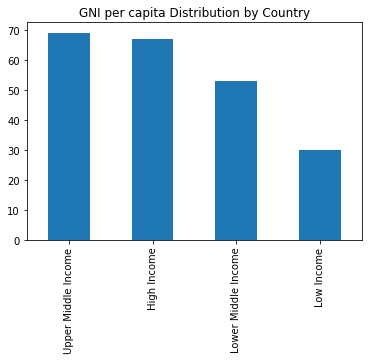

In [13]:
plot1 = binned_gni.plot.bar(title='GNI per capita Distribution by Country')

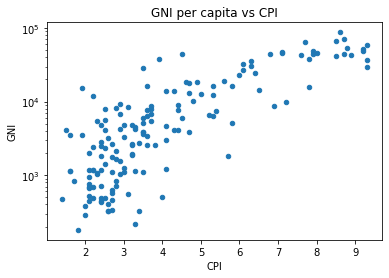

In [14]:
plot2 = CPI_GNI.plot.scatter(x='CPI', y='GNI', title='GNI per capita vs CPI')
plot2.set_yscale('log')

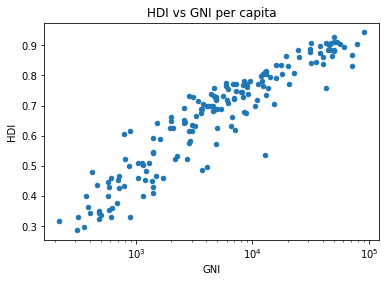

In [15]:
plot2 = HDI_GNI.plot.scatter(x='GNI', y='HDI', title='HDI vs GNI per capita')
plot2.set_xscale('log')

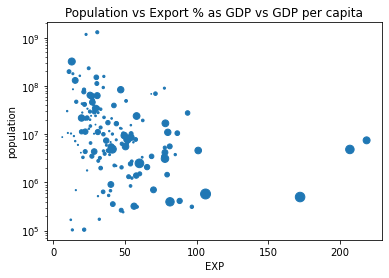

In [16]:
plot3 = PGE.plot.scatter(x='EXP', y='population', s=PGE['GDP']*0.001, title='Population vs Export % as GDP vs GDP per capita');
plot3.set_yscale('log')

In [17]:
export1 = PGE.sort_values(by='EXP', ascending=False)
export1.head(10)

,Country,population,GDP,EXP
31,"Hong Kong, China",7442226,48108.0,218.861632
120,Singapore,4815112,72056.0,207.170536
81,Luxembourg,495356,91147.0,172.366716
32,"Macao, China",573088,98722.0,106.294511
67,Ireland,4580870,43860.0,101.165280
85,Maldives,310954,11674.0,96.718863
84,Malaysia,27488690,20398.0,93.745912
86,Malta,411384,27906.0,88.184045
63,Hungary,10477746,22062.0,86.545056
35,"Congo, Rep.",3764082,5533.0,85.119671


From the graph, countries that are more dependent of export when compared to their economy size (>75%) tend to have higher GDP per capita (bigger bubble size). At the same time, it is observed that the population size is also less than 10 millions in almost all cases.

Few examples of such countries/regions are Singapore, Hong Kong and Luxembourg where all of them are small and open economies.

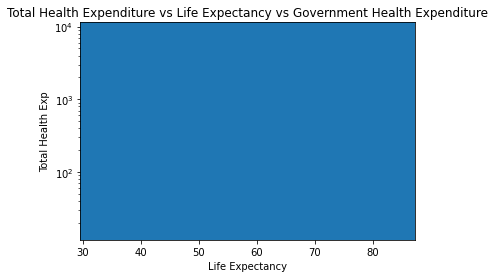

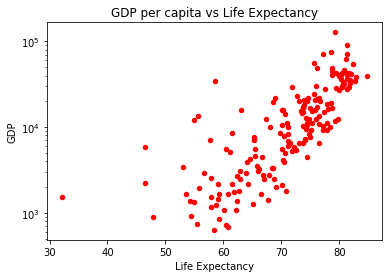

In [18]:
plot4a = LTGG.plot.scatter(x='Life Expectancy', y='Total Health Exp', s=LTGG['Gov. Health Exp.']*70, title='Total Health Expenditure vs Life Expectancy vs Government Health Expenditure');
plot4b = LTGG.plot.scatter(x='Life Expectancy', y='GDP', color='Red', title='GDP per capita vs Life Expectancy');

plot4a.set_yscale('log')
plot4b.set_yscale('log')

(0.0, 50.0)

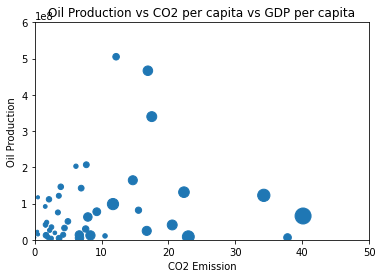

In [19]:
plot5 = OCG.plot.scatter(x='CO2 Emission', y='Oil Production', s=OCG['GDP']*0.002, title='Oil Production vs CO2 per capita vs GDP per capita');
plot5.set_ylim(0,600000000)
plot5.set_xlim(0,50)

# Conclusions
From the visualizations above, most of the inferences are based on correlation and not causation. In order to prove the causation among variables, most in depth studies need to be carried out and other independent variables need to be controlled.

# Limitation
    
    1. Most of the datasets have quite a number of missing datas. This causes a lot of the countries to be excluded in studying the relationship between variables.

    2. Most recent data available are usually before the year of 2011. The lack of most updated data prevented the studying of how most economies perform after the global financial crisis in 2008.